# Shopify Winter 2022 Data Science Intern Challenge

Both Question 1 and Question 2 are included in this Jupyter Notebook. I have also done further analysis on Question 1, a personal optional part, that can be found below Question 2.

## Question 1

In [8]:
#loading in the required packages
library(readxl) #loads in the readx1 package
library(ggplot2) #loads in the ggplot2 package
library(dplyr) #loads in the dplyr package

In [29]:
#loading in the data set
ShopifyDataSet <- read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx") #reads the file in from an Excel file called "2019 Winter Data Science Intern Challenge" to ShopifyDataSet

In [11]:
#gets and calculates the data's important numbers
dim(ShopifyDataSet) #tells users the number of usable columns and rows
summary(ShopifyDataSet$order_amount) #gives users the important numbers based on the order amounts except the SD
sd(ShopifyDataSet$order_amount) #gives users the SD of the order amount data

[1] 5000    7

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     90     163     284    3145     390  704000 

[1] 41282.54

As we can see, the median and mean differs by a huge margin (thus right-skewness) and there is a lot of variation (by looking at the standard deviation) within the data, so we can't just use the raw data to immediately get the AOV; the data must be cleaned first. Notice that the calculated AOV was the mean of the order_amount data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


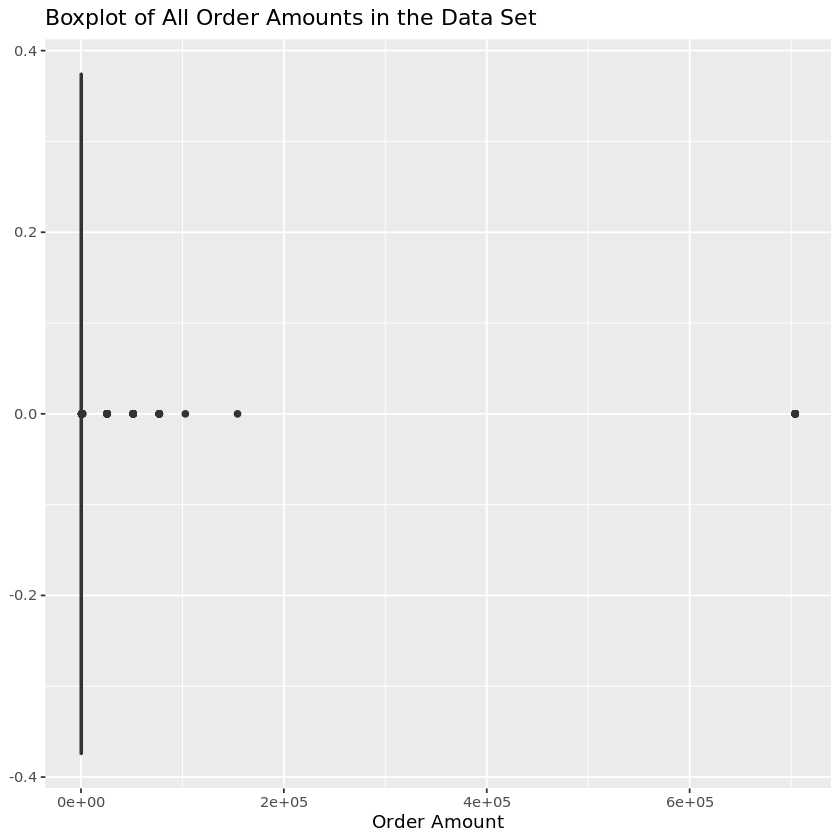

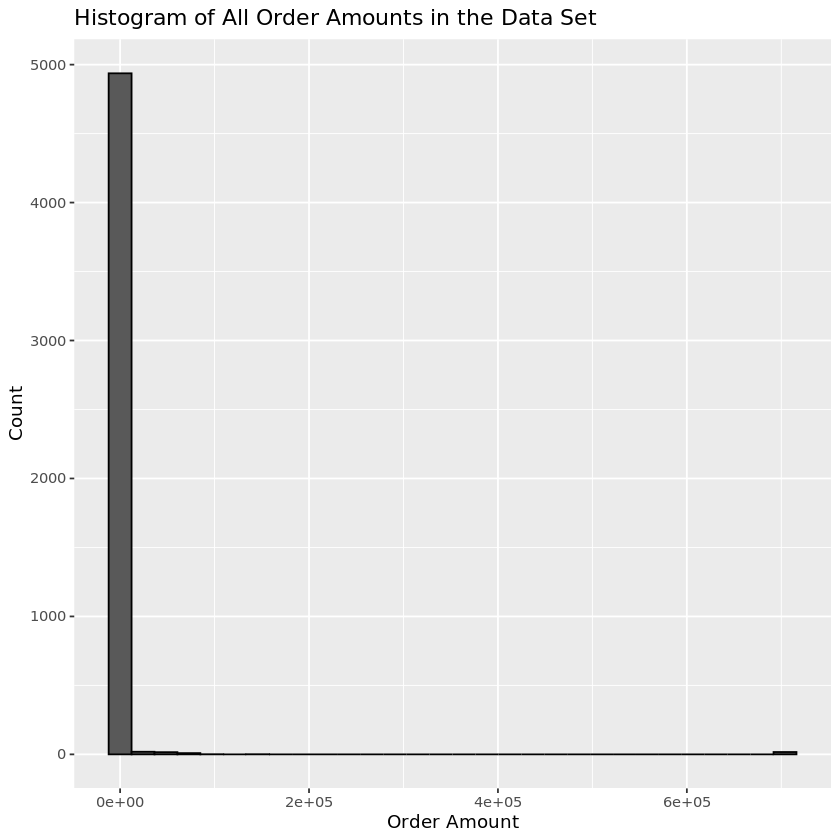

In [13]:
#plots both boxplot and histogram to get a sense of the original data
ggplot(ShopifyDataSet, aes(order_amount))+geom_boxplot()+labs(title="Boxplot of All Order Amounts in the Data Set")+xlab("Order Amount") #plots a boxplot of the order amount data
ggplot(ShopifyDataSet, aes(order_amount))+geom_histogram(color="black")+labs(title="Histogram of All Order Amounts in the Data Set")+xlab("Order Amount")+ylab("Count") #plots a histogram of the order amount data

To visualize the original data, I utilized a boxplot and histogram. From the boxplot, it is quite evident that, since all we can see is a line at about 0 (cannot even see a proper box), the data is right-skewed and has a lot of outliers, and the histogram confirms this.

In [16]:
#using a table and filtering the data to get a better sense of the data
table(ShopifyDataSet$order_amount>=1000) #tells users the numbers of orders placed that are greater than or equal to $1000
ShopifyDataSet %>%
  filter(ShopifyDataSet$order_amount<25725) #gives users the data set that are less than $25725
ShopifyDataSet %>%
  filter(ShopifyDataSet$order_amount>=25725) #gives users the data set that are greater than or equal to 2$5725


FALSE  TRUE 
 4929    71 

order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dttm>
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:51
3,44,861,144,1,cash,2017-03-14 04:23:55
4,18,935,156,1,credit_card,2017-03-26 12:43:36
5,18,883,156,1,credit_card,2017-03-01 04:35:10
6,58,882,138,1,credit_card,2017-03-14 15:25:00
7,87,915,149,1,cash,2017-03-01 21:37:57
8,22,761,292,2,cash,2017-03-08 02:05:37
9,64,914,266,2,debit,2017-03-17 20:56:50


order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dttm>
16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
161,78,990,25725,1,credit_card,2017-03-12 05:56:56
491,78,936,51450,2,debit,2017-03-26 17:08:18
494,78,983,51450,2,cash,2017-03-16 21:39:35
512,78,967,51450,2,cash,2017-03-09 07:23:13
521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
618,78,760,51450,2,cash,2017-03-18 11:18:41
692,78,878,154350,6,debit,2017-03-27 22:51:43


From the table, we can see that there are 71 orders that are above 1000. Then, after a further glance at the data set, I saw that there was quite a jump from orders that were in the 1000-2000 range to orders that were above 25000, so I filtered the orders into two separate buckets: those strictly less than 25725 and those greater than or equal to 25725.

In [28]:
#sorting the original data set by order_amount in descending order
SortedDataSet <- ShopifyDataSet[order(-ShopifyDataSet$order_amount),] #sorts the data set in descending amount based on order amount

I sorted the original data set by order_amount in descending order here, just for viewing convenience. If we take a closer look at the sorted data set, we can see that the orders of amount 704000 were done in store 42, whereas the other orders greater than 25000 were done in store 78. Personally, the 704000 orders done in store 42 seemed like they were bulk purchases (possibly for resale purposes) while the other large-amount orders done in store 78 seemed like they were purchases of a high-priced item (perhaps a limited edition shoe).

In [19]:
#setting up the values to use the 1.5*IQR rule
quantile(ShopifyDataSet$order_amount, c(0.25, 0.75)) #tells users the 1st and 3rd quartile of the order amount data
DataIQR=IQR(ShopifyDataSet$order_amount, na.rm=TRUE) #calculates the IQR of the order amount data
upperRange=quantile(ShopifyDataSet$order_amount)[4]+(1.5*DataIQR) #calculates the upper range of the order amount data using the 1.5*IQR rule
lowerRange=quantile(ShopifyDataSet$order_amount)[2]-(1.5*DataIQR) #calculates the lower range of the order amount data using the 1.5*IQR rule

25% 75% 
163 390

In [27]:
#uses the values calculated above to filter outliers and place the non-outliers into "narrowedData", the filtered data set
narrowedData <- subset(ShopifyDataSet, ShopifyDataSet$order_amount<=upperRange&ShopifyDataSet$order_amount>=lowerRange) #filters the data set by removing outliers from the order amount data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


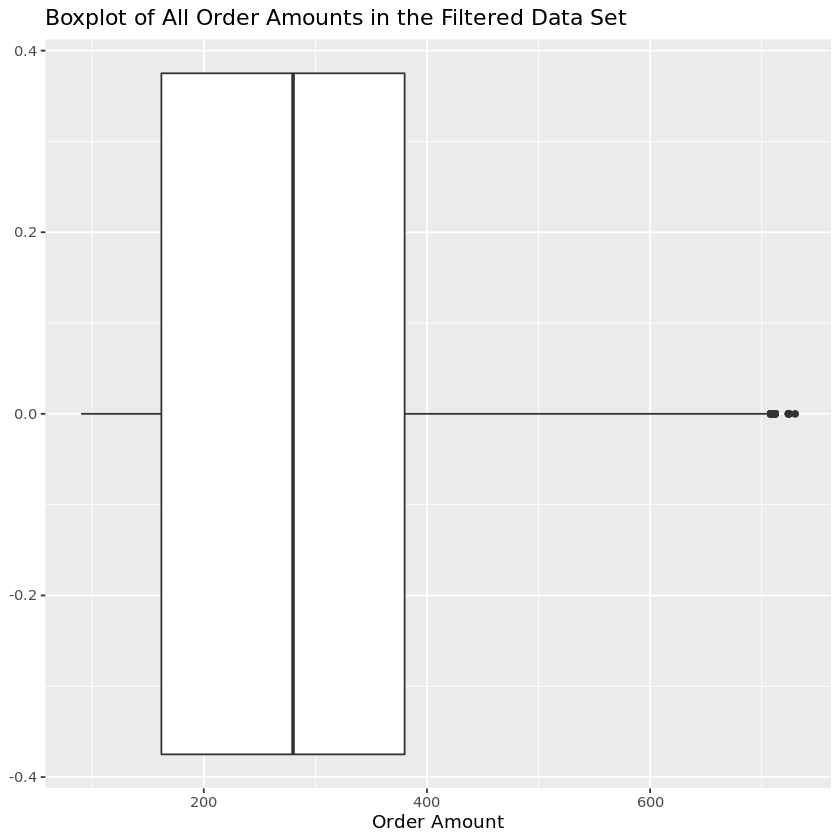

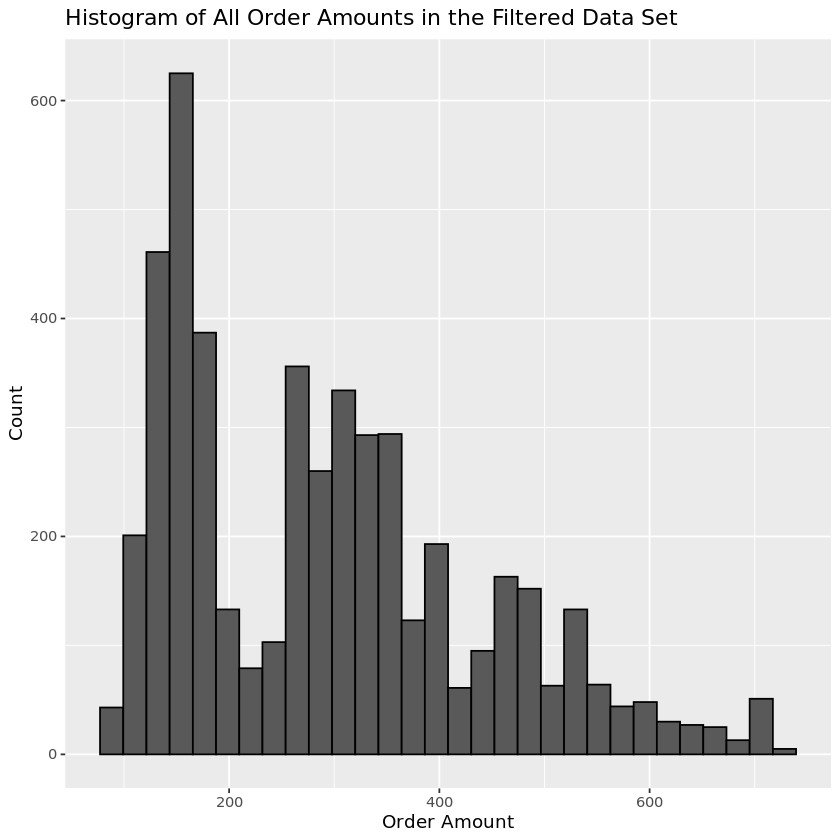

In [22]:
#plots both boxplot and histogram to get a sense of the filtered data and see if the new data is more reasonable
ggplot(narrowedData, aes(order_amount))+geom_boxplot()+labs(title="Boxplot of All Order Amounts in the Filtered Data Set")+xlab("Order Amount") #plots a boxplot of the order amount data in the filtered data set
ggplot(narrowedData, aes(order_amount))+geom_histogram(color="black")+labs(title="Histogram of All Order Amounts in the Filtered Data Set")+xlab("Order Amount")+ylab("Count") #plots a histogram of the order amount data in the filtered data set

As we can see, the boxplot and histogram looks much better now that we've filtered out the outliers, so this new data set is definitely more reasonable and usable than the raw data. Admittedly, it is still quite right-skewed, but that's mainly because some people bought more items than others.

In [23]:
#gets and calculates the filtered data's important numbers
dim(narrowedData)
summary(narrowedData$order_amount) #gives the users the important numbers of the order amount data in the filtered data set except the SD
sd(narrowedData$order_amount) # #gives the users the SD of the order amount data in the filtered data set

[1] 4859    7

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   90.0   162.0   280.0   293.7   380.0   730.0 

[1] 144.4534

Previously, we had 5000 columns in our data, and after removing outliers, we "only" have 4859, meaning that 5000-4859=141 of them were outliers. Based on the figures above, it is clear that although the mean is still slightly greater than the median, i.e. still slightly right-skewed, it is obviously much closer than when the raw data was used. The standard deviation of about 144 is also much more reasonable than that of the raw data.

**My Answers**

a.

The calculated AOV of 3145.13 is the mean of the raw data's order_amount. In this case, this AOV isn't a good measure because the data contained a lot of outliers (141 of them, to be precise). Due to the relatively large number of outliers, it only makes sense that we must filter out the outliers, and only then will we obtain a better data set to get the AOV from, which is what I did in the codes above.

b.

Although the mean and median is much closer to each other once the outliers were filtered out, the data was still right-skewed, so I believe that the median should be the right value to use for the AOV. If we were to use the raw data, however, it would definitely be a no-brainer to use the median considering how heavily right-skewed the data was.

c. By the last line of code for this question, the summary() function tells us that the median of the filtered data is 280.0, which is definitely much more reasonable than 3145.13. On the other hand, if we were to use the raw data, the summary() function based on the raw data gives a median of 284.

## Question 2

a.

SELECT COUNT (*)

FROM Orders, Shippers

WHERE Orders.ShipperID=Shippers.ShipperID AND Shippers.ShipperName='Speedy Express'

**Answer:** 54

b.

SELECT Employees.LastName, COUNT (*) AS Total

FROM Orders, Employees

WHERE Orders.EmployeeID = Employees.EmployeeID

GROUP BY Employees.LastName

ORDER BY Total Desc

LIMIT 1

**Answer:** Peacock (40 orders)

c.

SELECT Products.ProductName, Products.ProductID, SUM(OrderDetails.Quantity) AS Total

FROM Orders, OrderDetails, Customers, Products

WHERE Orders.OrderID=OrderDetails.OrderID AND OrderDetails.ProductID=Products.ProductID AND Customers.Country='Germany' AND Customers.CustomerID=Orders.CustomerID

GROUP BY Products.ProductName

ORDER BY Total DESC

LIMIT 1

**Answer:** Boston Crab Meat (Total Quantity of 160 and ProductID of 40)